# Glass Clasification
---
EL objetivo del problema es clasificar que tipo de vidrio es un base a su composición quimica

In [101]:
import pandas as pd

#Cargamos el archivo
ds=pd.read_csv("../data/glass.data")

#Eliminamos la columna que agrega por defecto Pandas al escrbir el archivo
ds=ds.drop(['Unnamed: 0'],axis=1)

#Revisamos el dataset
ds.head()

,ri,na,mg,al,si,k,ca,ba,fe,class
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


Este Dataset ha sido previamente analizado y he pasado por el proceso de preparacion de datos, 
por lo que pasaremos directamente al entrenamiento del modelo

# Entrenamiento del modelo K-Means 

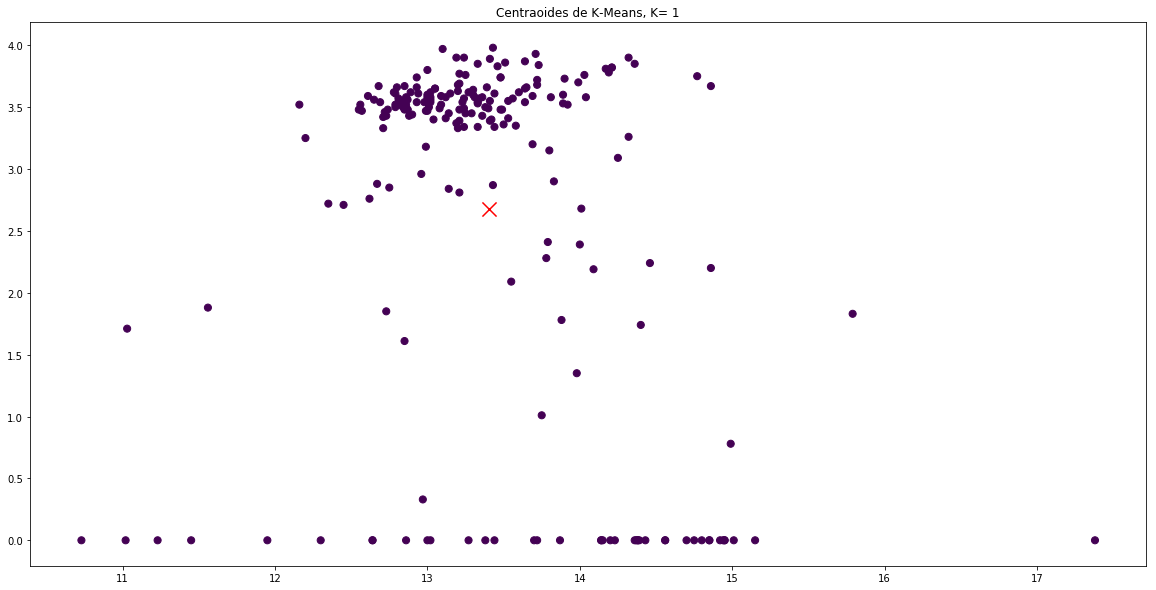

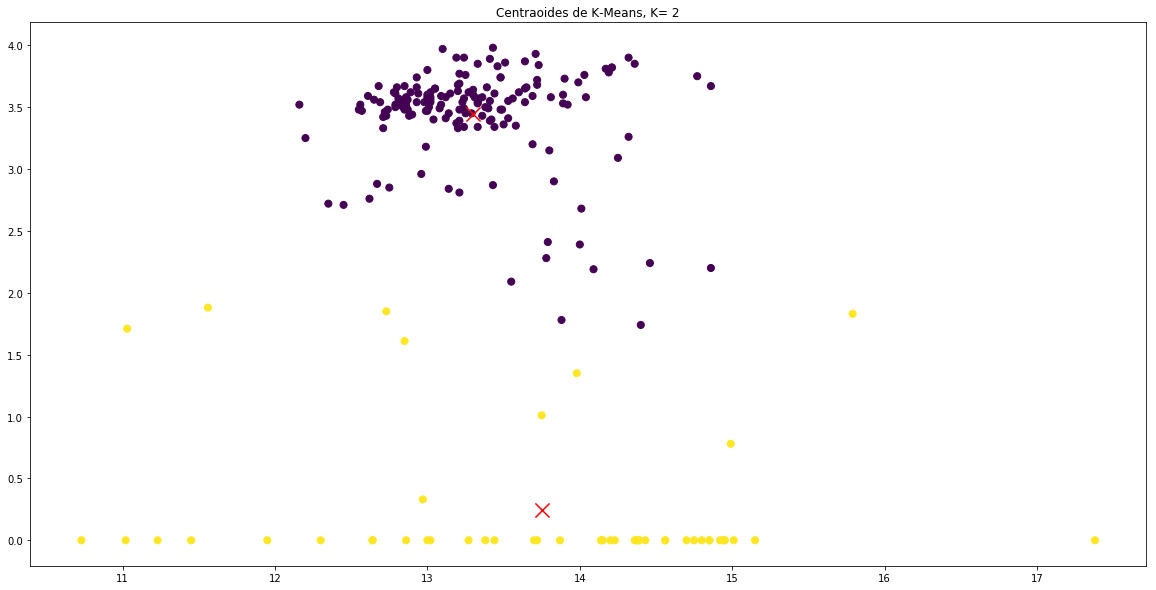

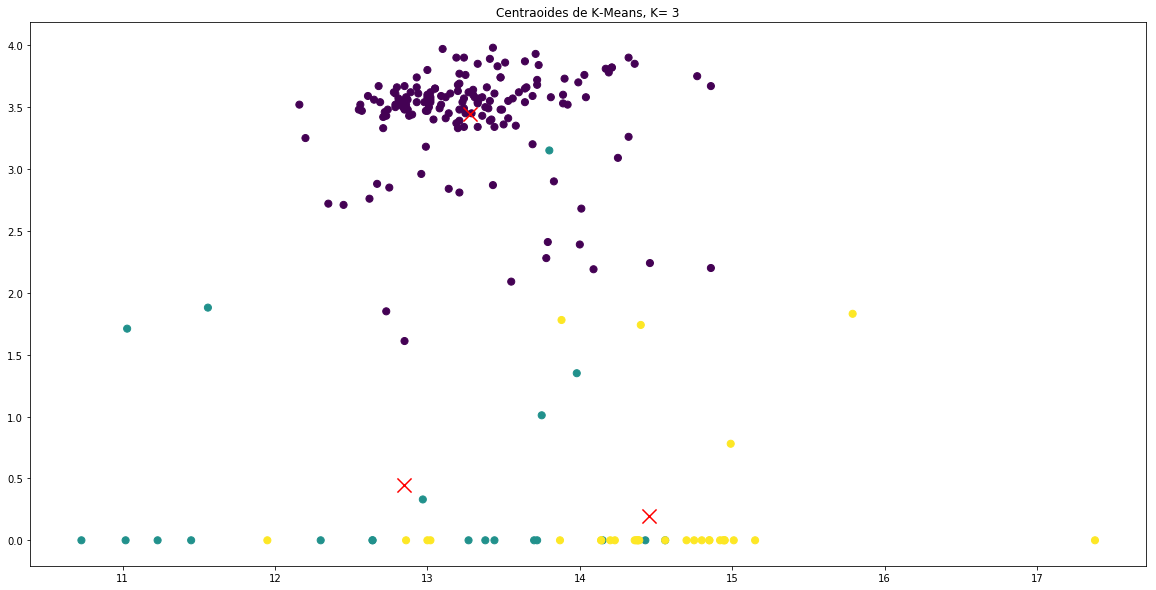

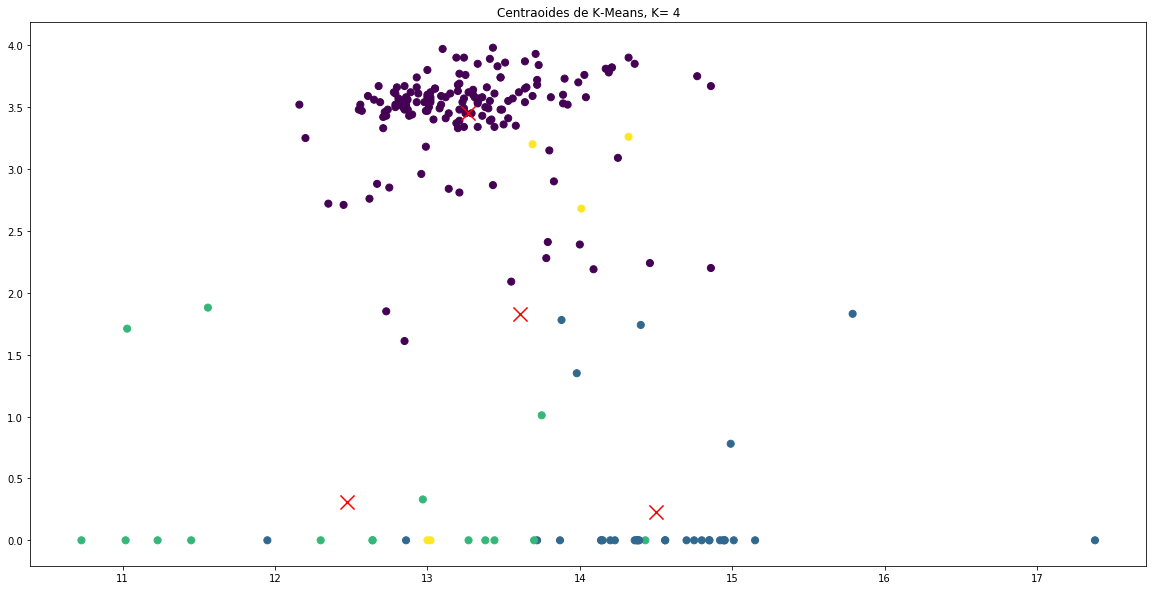

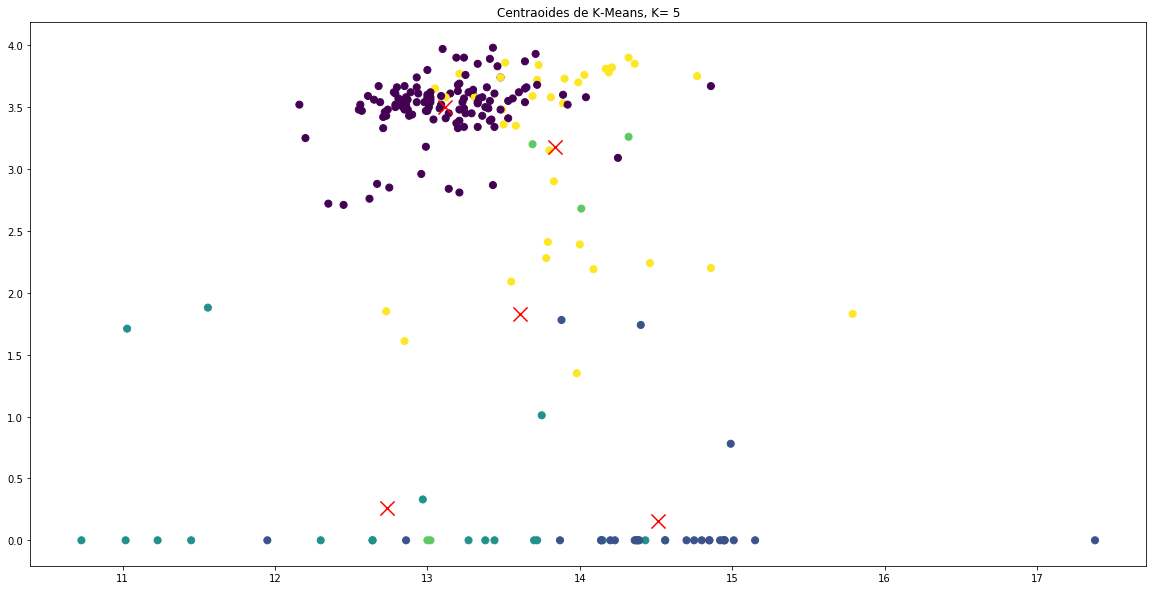

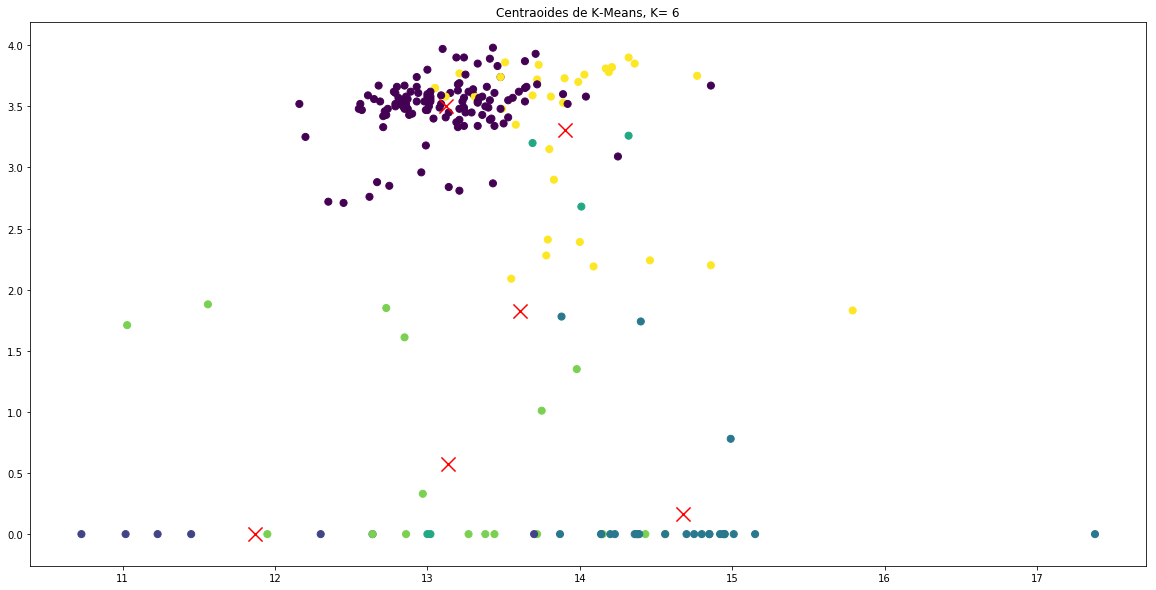

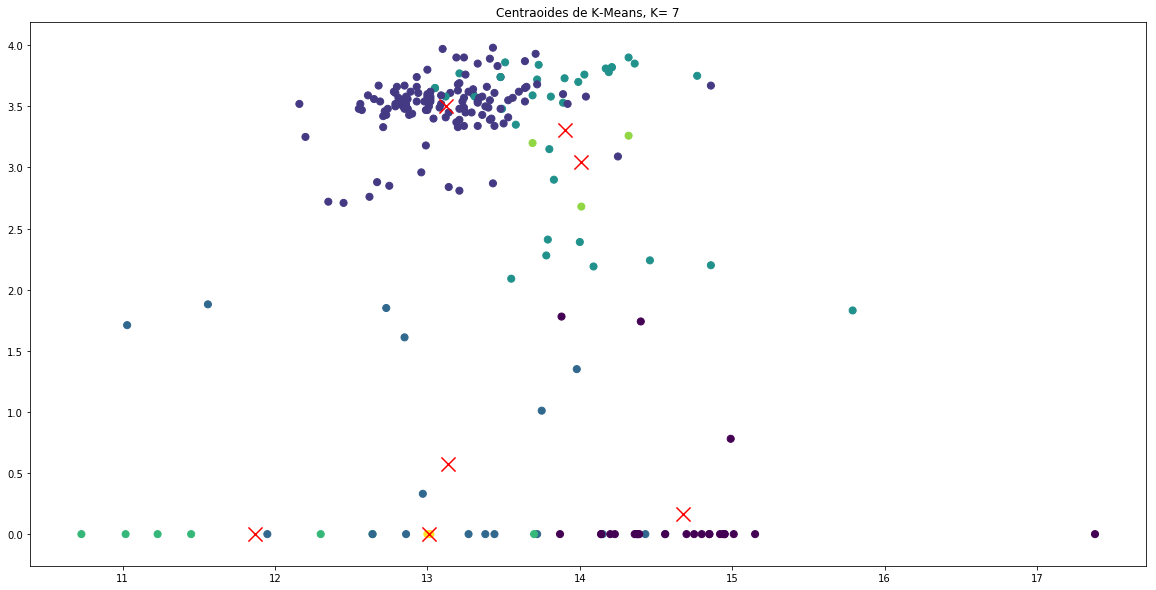

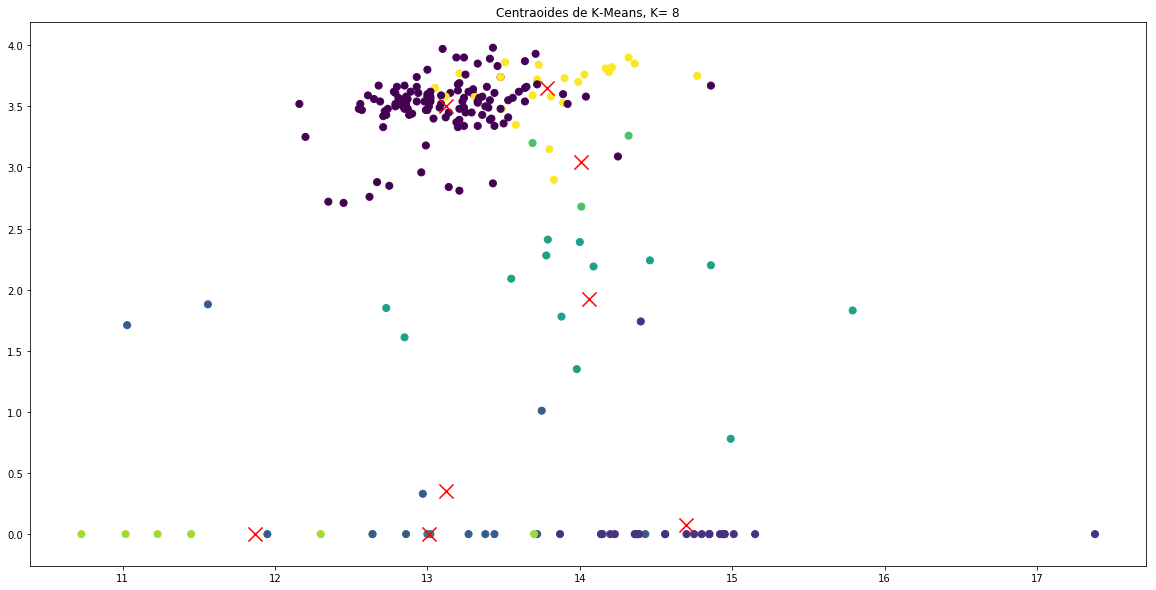

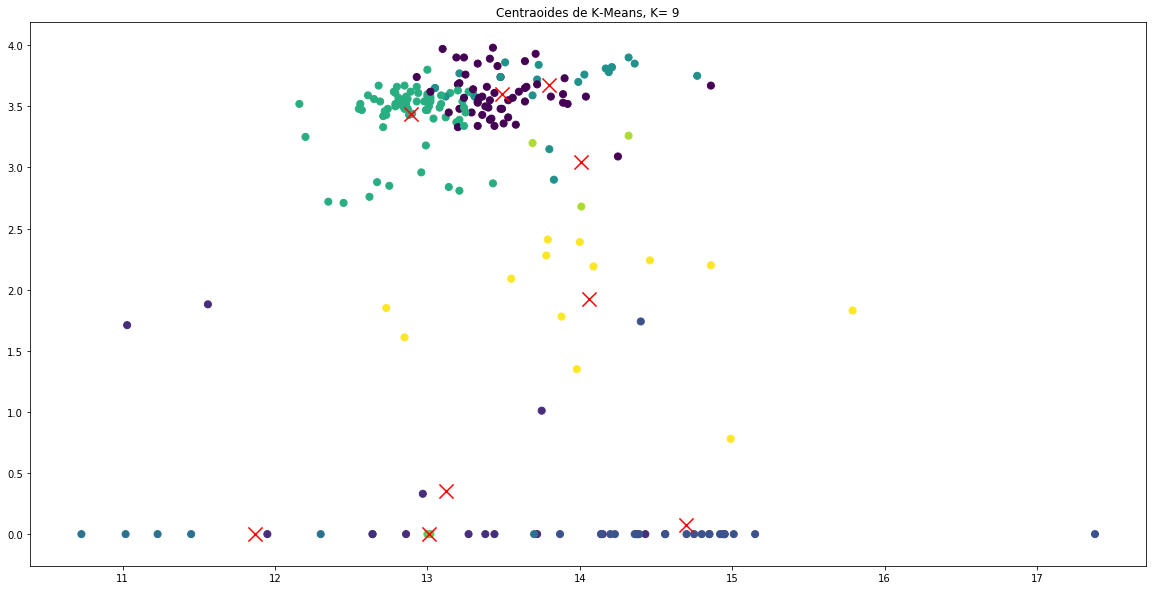

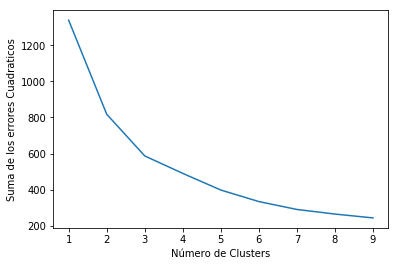

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

X= np.array(ds.drop(['class'],axis=1))

sum_square_error= {}
for k in range(1,10):

    # Creo y Entreno el modelo
    model=KMeans(n_clusters=k)
    predictions = model.fit_predict(X)

    #Obtengo los centrides del cluster 
    centroids = np.array(model.cluster_centers_)

    #Guardo la suma de los error al cuadrado para cada k
    sum_square_error[k]=model.inertia_
    
    #Imprimo el cluster con sus centrices
    plt.figure(figsize=(20,10))
    plt.title('Centraoides de K-Means, K= %s' % k)
    plt.scatter(X[:,1],X[:,2], c=predictions,s=50)
    plt.scatter(centroids[:,1], centroids[:,2], marker="x", color='r',s=200)
    

plt.figure()
plt.xlabel("Número de Clusters")
plt.ylabel("Suma de los errores Cuadraticos")
plt.plot(list(sum_square_error.keys()), list(sum_square_error.values()))
plt.show()

